In [33]:
#Import Base Packages

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Set Display Options

pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#read in once, large geospatial Dataframe
df_places = gpd.read_file('cbg.geojson')

In [4]:
#Import shapely
from shapely.geometry import Point, Polygon

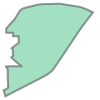

In [5]:
#Show geometry for the first census block
df_places['geometry'][0]

In [6]:
#import target probabilities and clean dataframe
target_probability_df = pd.read_csv('/Users/Mango/Desktop/Mod7Project 2/final_merger_with_fips.csv', index_col=False)

#target_probability_df
target_probability_df = target_probability_df.drop(columns=(['index', '0_probs']), axis=1)
target_probability_df = target_probability_df.rename(columns={'Unnamed: 0' : 'Target_Prob_Index'})

target_probability_df.head()

,Target_Prob_Index,GIDBG,Target_probs
0,7882,10010201001,0.452838
1,30346,10010201002,0.343070
2,75461,10010202001,0.436917
3,84286,10010202002,0.250825
4,7942,10010203001,0.131243


In [7]:
#import actual target values

actual_target_value_df = pd.read_csv('/Users/Mango/Desktop/Mod7Project 2/export_df_with_target.csv', index_col=False)

actual_target_value_df = actual_target_value_df.drop(columns=('Unnamed: 0'), axis=1)
actual_target_value_df.head()

,GIDBG,Actual_Target_Values
0,10010201001,0
1,10010201002,0
2,10010202001,0
3,10010202002,0
4,10010203001,0


In [8]:
#Merge target probabilities and actual target values

target_df_merged = pd.merge(target_probability_df, actual_target_value_df, how='left', left_on='GIDBG', right_on='GIDBG')
target_df_merged.head()

,Target_Prob_Index,GIDBG,Target_probs,Actual_Target_Values
0,7882,10010201001,0.452838,0
1,30346,10010201002,0.343070,0
2,75461,10010202001,0.436917,0
3,84286,10010202002,0.250825,0
4,7942,10010203001,0.131243,0


In [9]:
#Create Columns for map visualization

target_df_merged['Actual_probabilities'] = (target_df_merged['Target_probs']*target_df_merged['Actual_Target_Values'])
target_df_merged['Inverse_Target_values'] = (target_df_merged['Actual_Target_Values'] == False)
target_df_merged['Inverse_Target_values'] = target_df_merged['Inverse_Target_values'].astype(dtype=int)
target_df_merged['Inverse_Target_Probabilities'] = (target_df_merged['Inverse_Target_values']*target_df_merged['Target_probs'])
target_df_merged['Highest_False_Probabilities'] = (target_df_merged['Inverse_Target_Probabilities'].sort_values(ascending=False)[0:6674])

target_df_merged.head()

,Target_Prob_Index,GIDBG,Target_probs,Actual_Target_Values,Actual_probabilities,Inverse_Target_values,Inverse_Target_Probabilities,Highest_False_Probabilities
0,7882,10010201001,0.452838,0,0.0,1,0.452838,NaN
1,30346,10010201002,0.343070,0,0.0,1,0.343070,NaN
2,75461,10010202001,0.436917,0,0.0,1,0.436917,NaN
3,84286,10010202002,0.250825,0,0.0,1,0.250825,NaN
4,7942,10010203001,0.131243,0,0.0,1,0.131243,NaN


In [14]:
#These are the false positive probabilities
target_df_merged['Inverse_Target_Probabilities'].sort_values(ascending=False)[0:6674]
target_df_merged['NA_Target_Values'] = (target_df_merged['Inverse_Target_Probabilities'].sort_values(ascending=False)[0:6674])

target_df_merged['NA_Target_Values'].sort_values(ascending=False)[0:6674].head()

173218    0.852757
55297     0.833034
53437     0.830021
33652     0.819726
160742    0.814949
Name: NA_Target_Values, dtype: float64

In [15]:
#Turn GIDBG column to string for manipulation
target_df_merged['GIDBG'] = target_df_merged['GIDBG'].astype(dtype=str)

In [16]:
#Look for dividing line for 11 and 12 digit codes
target_df_merged['GIDBG'][39600:39700]

39600     90159031002
39601     90159031003
39602     90159031004
39603     90159031005
39604     90159031006
39605     90159031007
39606     90159031008
39607     90159032001
39608     90159032002
39609     90159041001
39610     90159041002
39611     90159041003
39612     90159041004
39613     90159044001
39614     90159044002
39615     90159044003
39616     90159044004
39617     90159045001
39618     90159045002
39619     90159045003
39620     90159045004
39621     90159045005
39622     90159051001
39623     90159051002
39624     90159051003
39625     90159051004
39626     90159051005
39627     90159061001
39628     90159061002
39629     90159061003
39630     90159071001
39631     90159071002
39632     90159071003
39633     90159072001
39634     90159072002
39635     90159072003
39636     90159072004
39637     90159073001
39638     90159073002
39639     90159073003
39640     90159073004
39641     90159081001
39642     90159081002
39643    100010401001
39644    100010401002
39645    1

In [34]:
#Add a zero to all 11 digit numbers
#This will make all GIDBG codes 12 digits
#This is needed to merge data

list_holder = []
for i in range(0,39643):
    list_holder.append("0" + target_df_merged['GIDBG'][i])


list_holder = pd.DataFrame(list_holder)
list_holder.rename(columns={0: 'GIDBG'}, inplace=True)
target_df_merged['GIDBG'].iloc[:39643] = list_holder['GIDBG'].iloc[:39643]

In [18]:
#Confirm 12 digit code length
target_df_merged['GIDBG'][39600:39700]

39600    090159031002
39601    090159031003
39602    090159031004
39603    090159031005
39604    090159031006
39605    090159031007
39606    090159031008
39607    090159032001
39608    090159032002
39609    090159041001
39610    090159041002
39611    090159041003
39612    090159041004
39613    090159044001
39614    090159044002
39615    090159044003
39616    090159044004
39617    090159045001
39618    090159045002
39619    090159045003
39620    090159045004
39621    090159045005
39622    090159051001
39623    090159051002
39624    090159051003
39625    090159051004
39626    090159051005
39627    090159061001
39628    090159061002
39629    090159061003
39630    090159071001
39631    090159071002
39632    090159071003
39633    090159072001
39634    090159072002
39635    090159072003
39636    090159072004
39637    090159073001
39638    090159073002
39639    090159073003
39640    090159073004
39641    090159081001
39642    090159081002
39643    100010401001
39644    100010401002
39645    1

In [21]:
target_df_merged.head()

,Target_Prob_Index,GIDBG,Target_probs,Actual_Target_Values,Actual_probabilities,Inverse_Target_values,Inverse_Target_Probabilities,Highest_False_Probabilities,NA_Target_Values
0,7882,010010201001,0.452838,0,0.0,1,0.452838,NaN,NaN
1,30346,010010201002,0.343070,0,0.0,1,0.343070,NaN,NaN
2,75461,010010202001,0.436917,0,0.0,1,0.436917,NaN,NaN
3,84286,010010202002,0.250825,0,0.0,1,0.250825,NaN,NaN
4,7942,010010203001,0.131243,0,0.0,1,0.131243,NaN,NaN


In [22]:
merged_df = pd.merge(df_places, target_df_merged, left_on='CensusBlockGroup', right_on='GIDBG', how='left')

In [23]:
#this creates dummy variable for high probability locations that don't contain TRI Sites

merged_df['Highest_False_Binary'] = (merged_df['Highest_False_Probabilities'] > 0.5)
merged_df['Highest_False_Binary'] = merged_df['Highest_False_Binary'].astype(dtype=int)

In [24]:
#This is the final dataframe for producing the visualizations
merged_df.head()

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry,Target_Prob_Index,GIDBG,Target_probs,Actual_Target_Values,Actual_probabilities,Inverse_Target_values,Inverse_Target_Probabilities,Highest_False_Probabilities,NA_Target_Values,Highest_False_Binary
0,01,081,041600,1,010810416001,AL,Lee County,H1,(POLYGON ((-85.37281500011215 32.6342380002835...,48327,010810416001,0.825134,1,0.825134,0,0.000000,NaN,NaN,0
1,01,081,041600,2,010810416002,AL,Lee County,H1,(POLYGON ((-85.38346400016343 32.6483780003445...,55835,010810416002,0.338741,0,0.000000,1,0.338741,NaN,NaN,0
2,01,081,041700,4,010810417004,AL,Lee County,H1,(POLYGON ((-85.37139200014064 32.6013869998102...,108751,010810417004,0.551759,0,0.000000,1,0.551759,0.551759,0.551759,1
3,01,073,011107,4,010730111074,AL,Jefferson County,H1,(POLYGON ((-86.64796800012306 33.5920459996232...,105503,010730111074,0.229074,0,0.000000,1,0.229074,NaN,NaN,0
4,01,073,011108,4,010730111084,AL,Jefferson County,H1,(POLYGON ((-86.65205899992287 33.5986850000127...,53354,010730111084,0.269087,0,0.000000,1,0.269087,NaN,NaN,0


In [32]:
import descartes

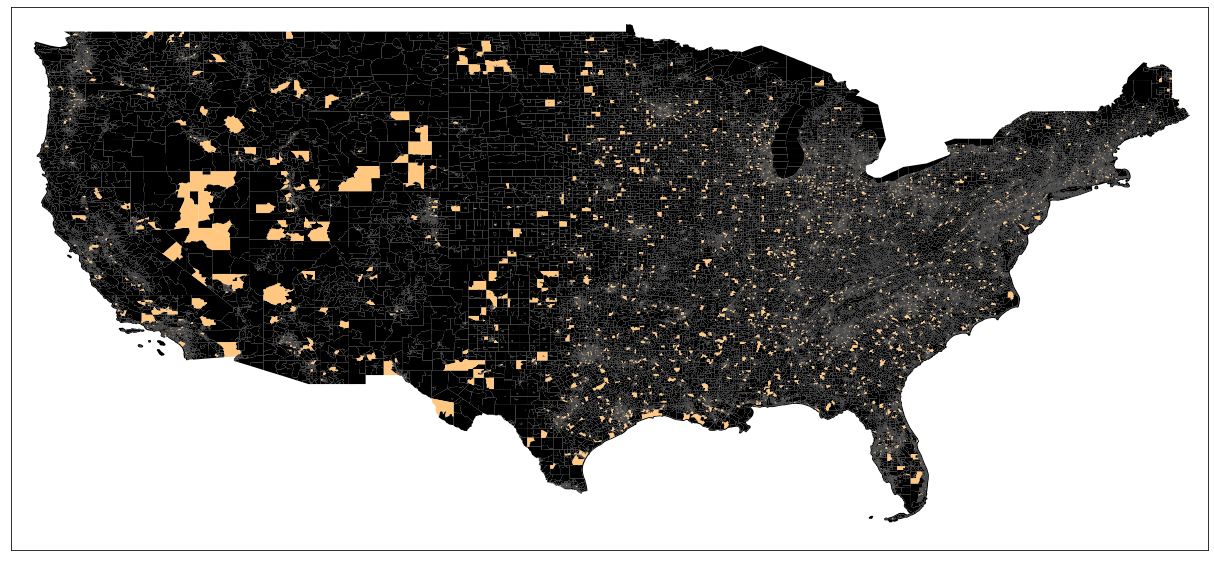

In [46]:
f, ax = plt.subplots(1, figsize=(75, 10))
ax = merged_df.plot(column='Actual_Target_Values', cmap='copper', ax=ax)
ax.set_xlim([-126, -66])
ax.set_ylim([23, 50.25])
plt.xticks([], [])
plt.yticks([], [])
plt.show()

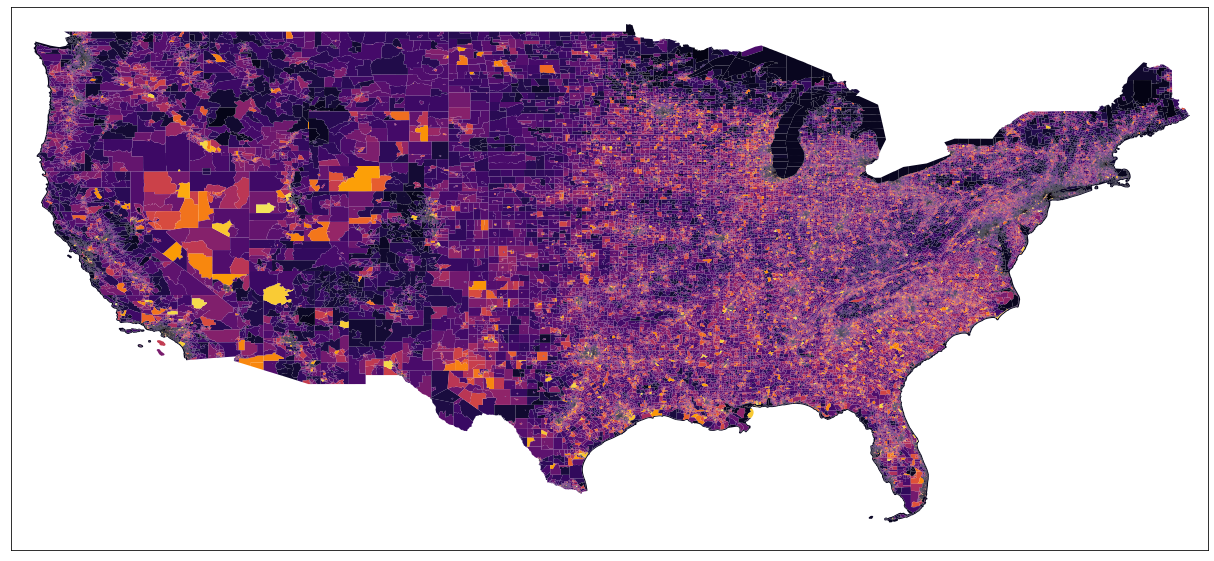

In [48]:
f, ax = plt.subplots(1, figsize=(75, 10))
ax = merged_df.plot(column='Target_probs', cmap='inferno', ax=ax)
ax.set_xlim([-126, -66])
ax.set_ylim([23, 50.25])
plt.xticks([], [])
plt.yticks([], [])
plt.show()

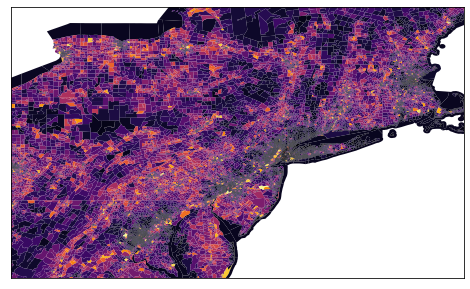

In [28]:
f, ax = plt.subplots(1, figsize=(25, 5))
ax = merged_df.plot(column='Target_probs', cmap='inferno' ,ax=ax)
ax.set_xlim([-80, -70])
ax.set_ylim([38, 44])
plt.xticks([], [])
plt.yticks([], [])
plt.show()

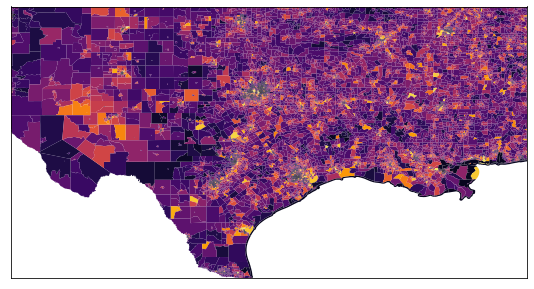

In [29]:
f, ax = plt.subplots(1, figsize=(25, 5))
ax = merged_df.plot(column='Target_probs', cmap='inferno', ax=ax)
ax.set_xlim([-106, -87])
ax.set_ylim([26, 36])
plt.xticks([], [])
plt.yticks([], [])
plt.show()

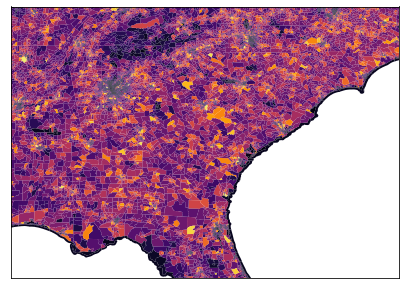

In [30]:
f, ax = plt.subplots(1, figsize=(25, 5))
ax = merged_df.plot(column='Target_probs', cmap='inferno' ,ax=ax)
ax.set_xlim([-87, -77])
ax.set_ylim([29, 36])
plt.xticks([], [])
plt.yticks([], [])
plt.show()

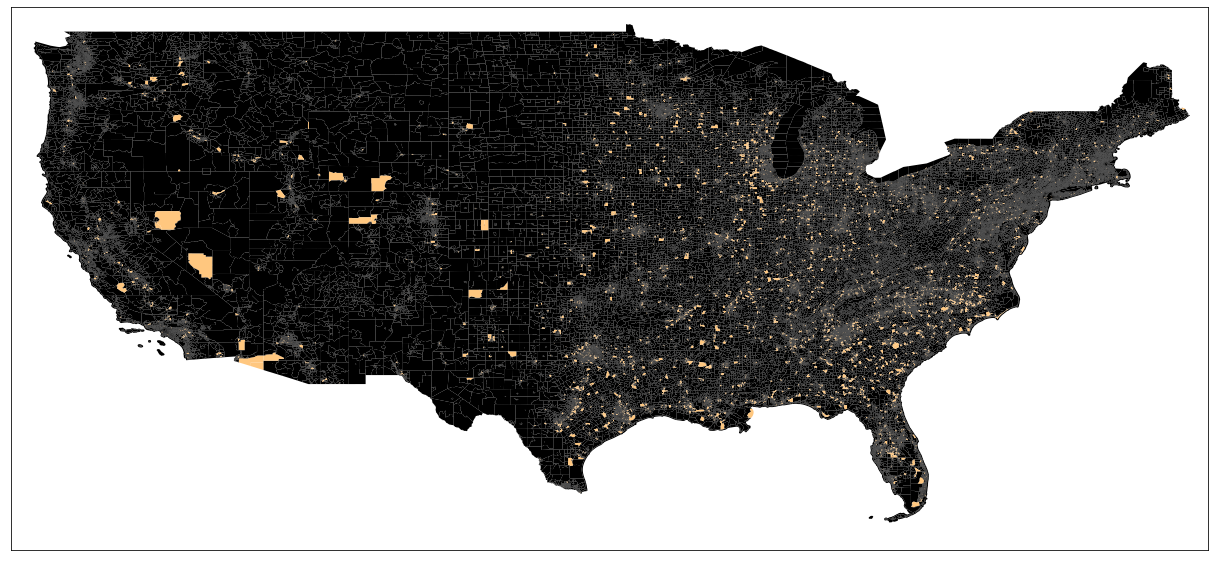

In [49]:
f, ax = plt.subplots(1, figsize=(75, 10))
ax = merged_df.plot(column='Highest_False_Binary', cmap='copper', ax=ax)
ax.set_xlim([-126, -66])
ax.set_ylim([23, 50.25])
plt.xticks([], [])
plt.yticks([], [])
plt.show()